## Imports

In [420]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from matplotlib import pyplot as plt

# for testing
import numpy as np

Zunächst einmal müssen wir die Daten vorbereiten, um sie für das neuronale Netz nutzbar zu machen. Die MNIST-Datenbank besteht aus 70.000 Bildern von handgeschriebenen Ziffern, die jeweils eine Größe von 28x28 Pixeln haben. Wir müssen die Bilder in ein geeignetes Format bringen, um sie für das neuronale Netz verwenden zu können. Dazu normalisieren wir die Pixelwerte auf einen Bereich zwischen 0 und 1 und teilen die Daten in Trainings- und Testdaten auf.

#### Dataset laden

In [421]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

#### Processing Data

In [422]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

#### Scaling Data

werte sind aktuell noch zwischen 0 und 255

In [423]:
x_train[0][490:500]

array([  0,   0,   0, 249, 253, 249,  64,   0,   0,   0], dtype=uint8)

Werte sollten zwischen 0 und 1 liegen
- Werte von int zu float
- durch 255 teilen um von 0 zu 1 zu erhalten

In [424]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0][490:500]

array([0.        , 0.        , 0.        , 0.9764706 , 0.99215686,
       0.9764706 , 0.2509804 , 0.        , 0.        , 0.        ],
      dtype=float32)

#### Categorizing

In [425]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Make Model

Die Aktivierungsfunktion für die Hidden Layers ist die ReLU-Funktion (rectified linear unit), da sie sich in der Praxis als besonders effektiv erwiesen hat. Für die Output-Schicht verwenden wir die Softmax-Aktivierungsfunktion, die die Wahrscheinlichkeiten für jede Klasse ausgibt.

define network parameters

In [426]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [427]:
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, input_shape=(28*28,)))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

model = define_model()

In [428]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 256)               200960    
                                                                 
 activation_91 (Activation)  (None, 256)               0         
                                                                 
 dropout_63 (Dropout)        (None, 256)               0         
                                                                 
 dense_83 (Dense)            (None, 256)               65792     
                                                                 
 activation_92 (Activation)  (None, 256)               0         
                                                                 
 dropout_64 (Dropout)        (None, 256)               0         
                                                                 
 dense_84 (Dense)            (None, 256)             

Berechnung der Paramter:


##### Compiling

<code>nesterov=True</code> <br>
When nesterov=True, the SGD optimizer uses Nesterov Accelerated Gradient (NAG) descent to update the parameters.

NAG is a modification of traditional momentum gradient descent that helps the optimizer to converge faster by taking into account the future gradient. Instead of using the current velocity to update the parameters, NAG calculates the velocity by applying the momentum term to the future gradient, that is, the gradient calculated using the parameter value that would result from the current velocity. This allows the optimizer to make more informed updates, leading to faster convergence and potentially better results. <br>

<code>loss='categorical_crossentropy'</code> <br>
MNIST is a multi-class classification problem, and categorical_crossentropy is a natural fit for such problems, as it measures the difference between the predicted class probabilities and the true class probabilities. In the case of MNIST, the true class probabilities are represented as one-hot encoded vectors, where each digit has a unique binary value (e.g. [0,0,0,1,0,0,0,0,0,0] for digit 3).

In [429]:
optimizer = SGD(learning_rate=0.01,
                momentum=0.9, 
                nesterov=True)
model.compile(loss=categorical_crossentropy, 
              optimizer=optimizer, 
              metrics='accuracy')

#### Train the model

In [430]:
history = model.fit(x_train, y_train, epochs=25, batch_size=batch_size, validation_split=0.1)

Epoch 1/25
422/422 [==============================] - 2s 4ms/step - loss: 0.8488 - accuracy: 0.7212 - val_loss: 0.2187 - val_accuracy: 0.9348
Epoch 2/25
422/422 [==============================] - 2s 4ms/step - loss: 0.3637 - accuracy: 0.8913 - val_loss: 0.1539 - val_accuracy: 0.9535
Epoch 3/25
422/422 [==============================] - 2s 4ms/step - loss: 0.2787 - accuracy: 0.9180 - val_loss: 0.1189 - val_accuracy: 0.9657
Epoch 4/25
422/422 [==============================] - 2s 4ms/step - loss: 0.2359 - accuracy: 0.9312 - val_loss: 0.1028 - val_accuracy: 0.9695
Epoch 5/25
422/422 [==============================] - 2s 4ms/step - loss: 0.2064 - accuracy: 0.9400 - val_loss: 0.0963 - val_accuracy: 0.9735
Epoch 6/25
422/422 [==============================] - 2s 4ms/step - loss: 0.1863 - accuracy: 0.9453 - val_loss: 0.0880 - val_accuracy: 0.9748
Epoch 7/25
422/422 [==============================] - 2s 4ms/step - loss: 0.1681 - accuracy: 0.9496 - val_loss: 0.0814 - val_accuracy: 0.9753
Epoch 

#### Test model

1/1 [==============================] - 0s 14ms/step


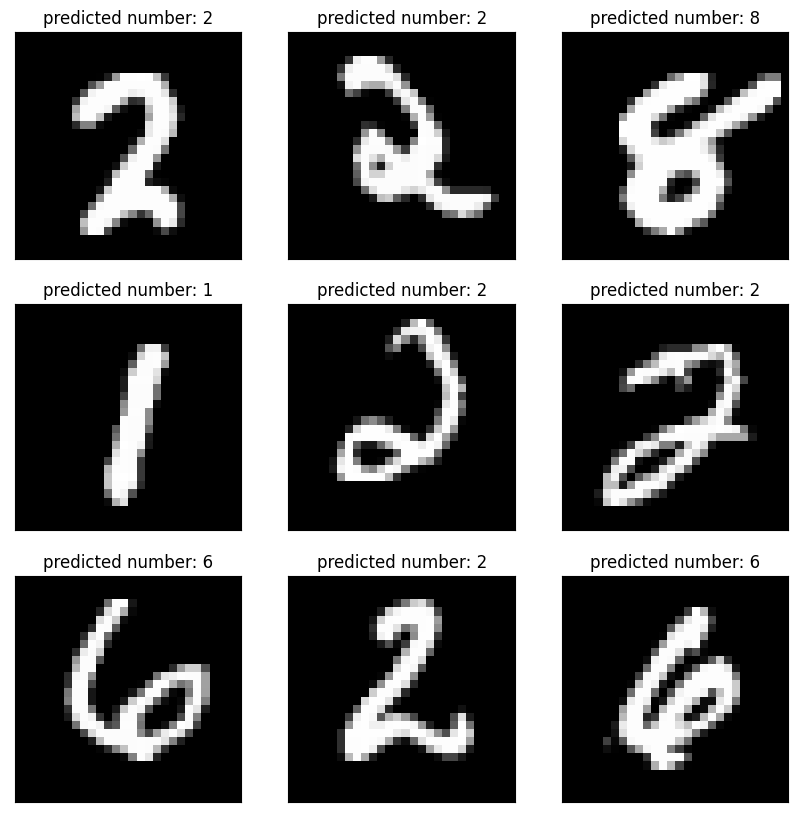

In [431]:
# predict 9 random images
random_images = np.random.randint(0, x_test.shape[0], 9)
fig, axes = plt.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[random_images[i]].reshape(28,28))
    ax.set_title(f'predicted number: {model.predict(x_test[random_images[i]:random_images[i]+1]).argmax()}')
    ax.set_xticks([])
    ax.set_yticks([])

#### With Regularizer

Ich verwende den l2 regularizer und mache den rest genau gleich wie oben

In [436]:
# Define a deep neural network model with three dense layers, each with 'hidden_units' number of neurons.
# Add ReLU activation function to each hidden layer and a softmax activation function to the output layer.
# Use L2 regularization with strength 0.001 on the weights of the first dense layer to prevent overfitting.
# Apply dropout with probability 'dropout' after each hidden layer to further reduce overfitting.
# The input to the model is a flattened 28x28 image.
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, 
                    kernel_regularizer=l2(0.001), 
                    input_shape=(28*28,)))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

model = define_model()

In [437]:
optimizer = SGD(learning_rate=0.01,
                momentum=0.9, 
                nesterov=True)
model.compile(loss=categorical_crossentropy, 
              optimizer=optimizer, 
              metrics='accuracy')

history_reg = model.fit(x_train, y_train, epochs=25, batch_size=batch_size, validation_split=0.1)

Epoch 1/25
422/422 [==============================] - 3s 5ms/step - loss: 2.2131 - accuracy: 0.7160 - val_loss: 1.1133 - val_accuracy: 0.9350
Epoch 2/25
422/422 [==============================] - 2s 5ms/step - loss: 0.9921 - accuracy: 0.8927 - val_loss: 0.5788 - val_accuracy: 0.9568
Epoch 3/25
422/422 [==============================] - 2s 5ms/step - loss: 0.6024 - accuracy: 0.9172 - val_loss: 0.3475 - val_accuracy: 0.9653
Epoch 4/25
422/422 [==============================] - 2s 4ms/step - loss: 0.4355 - accuracy: 0.9284 - val_loss: 0.2620 - val_accuracy: 0.9692
Epoch 5/25
422/422 [==============================] - 2s 4ms/step - loss: 0.3678 - accuracy: 0.9328 - val_loss: 0.2201 - val_accuracy: 0.9718
Epoch 6/25
422/422 [==============================] - 2s 4ms/step - loss: 0.3417 - accuracy: 0.9344 - val_loss: 0.2078 - val_accuracy: 0.9718
Epoch 7/25
422/422 [==============================] - 2s 4ms/step - loss: 0.3281 - accuracy: 0.9362 - val_loss: 0.2030 - val_accuracy: 0.9732
Epoch 

#### Plot both Models and Show difference

In [438]:
def create_metric_plot(axis, history, metric):
    axis.plot(history.history[metric])
    axis.plot(history.history["val_" + metric])
    # add line for epoch 10 & 20
    axis.axvline(x=9, color='r', linestyle='--')
    axis.axvline(x=19, color='r', linestyle='--')
    # add text for epoch 10 & 20
    axis.text(9, history.history[metric][9], round(history.history[metric][9], 3), color='r')
    axis.text(9, history.history["val_" + metric][9], round(history.history["val_" + metric][9], 3), color='r')
    axis.text(19, history.history[metric][19], round(history.history[metric][19], 3), color='r')
    axis.text(19, history.history["val_" + metric][19], round(history.history["val_" + metric][19], 3), color='r')
    axis.set_title("Model " + metric.capitalize())
    axis.yaxis.set_label_text(metric.capitalize())
    axis.xaxis.set_label_text("Epoch")
    axis.xaxis.set_ticks(range(0,20))
    return axis

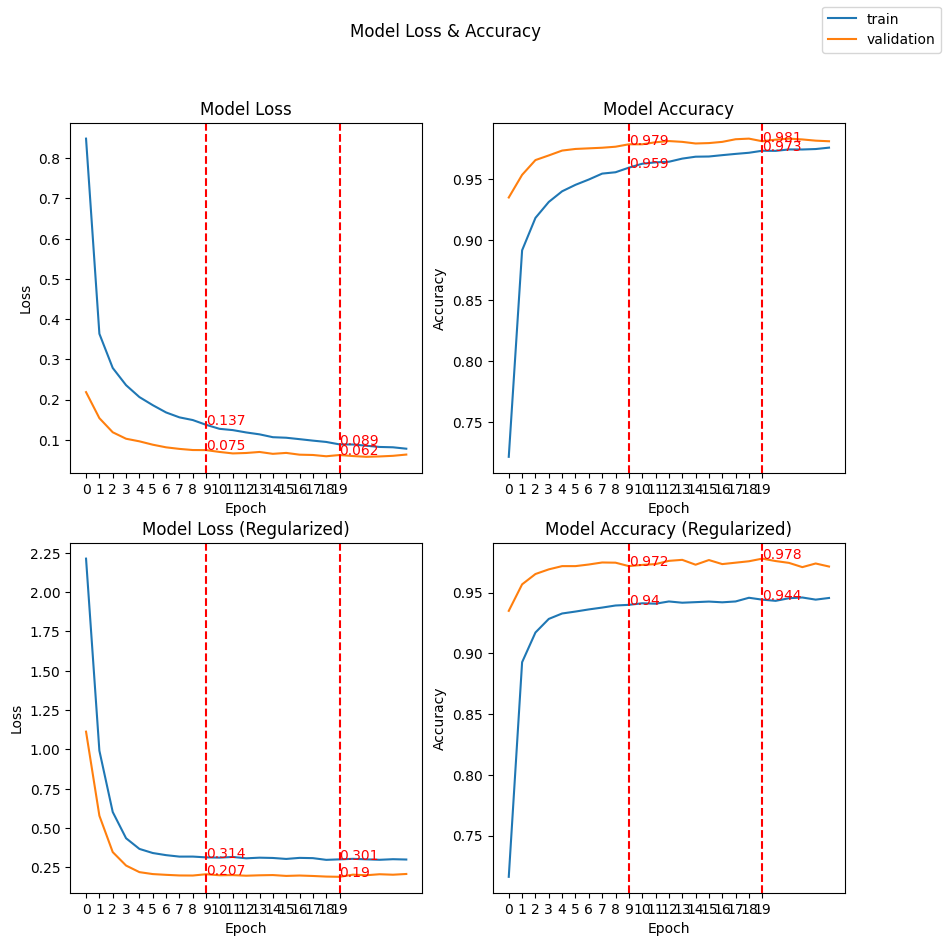

In [439]:
# 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1 = create_metric_plot(ax1, history, "loss")
ax2 = create_metric_plot(ax2, history, "accuracy")
ax3 = create_metric_plot(ax3, history_reg, "loss")
ax3.title.set_text("Model Loss (Regularized)")
ax4 = create_metric_plot(ax4, history_reg, "accuracy")
ax4.title.set_text("Model Accuracy (Regularized)")
fig.suptitle("Model Loss & Accuracy")
fig.legend(["train", "validation"], loc="upper right")